# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [30]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"

testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

        
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [31]:
### Replace each question mark with the appropriate value.
import numpy as np
# TODO: Number of training examples
n_train = y_train.size

# TODO: Number of testing examples.
n_test = y_test.size

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

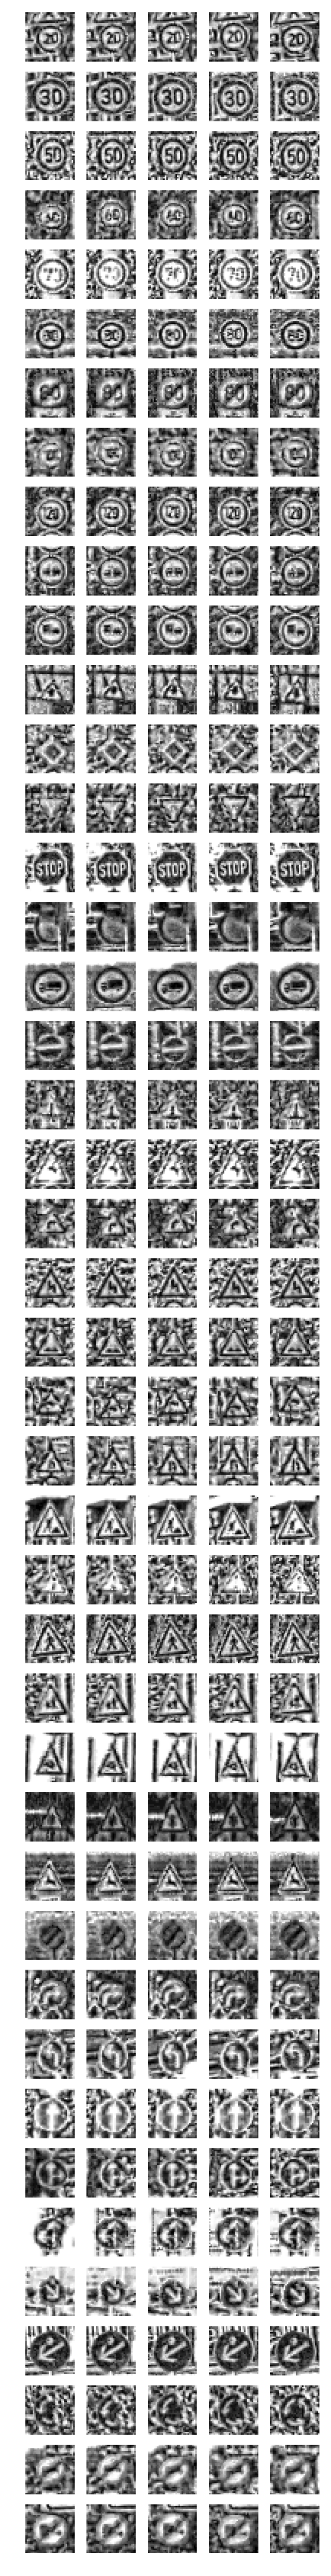

In [32]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
maximages = 5
plt.figure(figsize = (maximages, n_classes))
count = 1
for typeimage in range(n_classes):
    selection_matrix = y_train == typeimage
    subset = X_proc[selection_matrix]
    for i in range(maximages):
        image = subset[i][:,:,0]
        plt.subplot(n_classes, maximages, count)
        plt.axis('off')
        plt.imshow(image, cmap='gray',interpolation='none')
        count += 1

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [33]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2
from tqdm import tqdm
from skimage import exposure
from pathlib import Path

def preprocessImages(X):
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2] #Y conversion
    X = (X / 255.).astype(np.float32)
      
    # Apply localized histogram localization  
    for i in tqdm(range(X.shape[0])):
        X[i] = exposure.equalize_adapthist(X[i])   
    
    X = X.reshape(X.shape + (1,))
    return X

my_file = Path("trainproc.p")
if my_file.is_file():
    with open("trainproc.p", mode='rb') as f:
        X_proc = pickle.load(f)
    with open("testproc.p", mode='rb') as f:
        X_testproc = pickle.load(f)
else:
    X_proc = preprocessImages(X_train)
    X_testproc = preprocessImages(X_test)
    with open("trainproc.p", mode='wb') as f:
        pickle.dump(X_proc,f)
    with open("testproc.p", mode='wb') as f:
        pickle.dump(X_testproc,f)


#gray_x_train = gray_x_train.reshape(gray_x_train.shape[0],-1).astype(np.float32)
#gray_x_test = gray_x_test.reshape(gray_x_test.shape[0],-1).astype(np.float32)

  0%|          | 0/39209 [00:00<?, ?it/s]/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
100%|██████████| 12630/12630 [01:15<00:00, 166.29it/s]


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** Normalized the input given maximum rgb values (255)

In [3]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample

### Feel free to use as many code cells as needed.
#X_train = X_train.astype(np.float32)
### randomize
(X_train, x_valid, y_train,y_valid) = train_test_split(X_proc, y_train, test_size=0.1, random_state=40)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [23]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
from tqdm import tqdm

### Define your architecture here.
### Feel free to use as many code cells as needed.
def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

#def convnet(x, size, input, output):
#    conv_w = tf.Variable(tf.truncated_normal(shape=(size,size,input,output)))
#    conv_b = tf.Variable(tf.zeros(output))
#    conv = tf.nn.conv2d(x, conv_w, strides = [1,1,1,1], padding='SAME') + conv_b
#    conv = tf.nn.relu(conv)
#    conv = maxpool2d(conv)
#    return conv  

#def fulcon(x, input, output):
#    fc_w = tf.Variable(tf.truncated_normal(shape=(input, output)))
#    fc_b = tf.Variable(tf.zeros(output))
#    fc   = tf.matmul(x, fc_w) + fc_b
#    return fc

dropout = tf.placeholder(tf.float32)
features = tf.placeholder(tf.float32,(None, 32, 32, 1))
labels = tf.placeholder(tf.int32, (None))
one_hot = tf.one_hot(labels, n_classes)

EPOCHS = 60
BATCH_SIZE = 256
rate = 0.001
mu = 0
sigma = 0.1

#conv1 = convnet(features, 5, 3, 10) #input = 32x32x3, output = 16x16x10
#conv2 = convnet(conv1, 5, 10, 32) #input = 16x16x10, ouput = 8x8x32

conv1_w = tf.Variable(tf.truncated_normal(shape=(5,5,1,32),mean = mu, stddev = sigma ))
conv1_b = tf.Variable(tf.zeros(32))
conv1 = tf.nn.conv2d(features, conv1_w, strides = [1,1,1,1], padding='SAME') + conv1_b
conv1 = tf.nn.relu(conv1)
conv1 = maxpool2d(conv1)
#conv1 = tf.Print(conv1, [conv1], "conv1:")

conv2_w = tf.Variable(tf.truncated_normal(shape=(5,5,32,64), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(64))
conv2 = tf.nn.conv2d(conv1, conv2_w, strides = [1,1,1,1], padding='SAME') + conv2_b
conv2 = tf.nn.relu(conv2)
conv2 = maxpool2d(conv2)

conv3_w = tf.Variable(tf.truncated_normal(shape=(5,5,64,128), mean = mu, stddev = sigma))
conv3_b = tf.Variable(tf.zeros(128))
conv3 = tf.nn.conv2d(conv2, conv3_w, strides = [1,1,1,1], padding='SAME') + conv3_b
conv3 = tf.nn.relu(conv3)
conv3 = maxpool2d(conv3)

fc   = flatten(conv3) #64*128 = 8192
fc1_w = tf.Variable(tf.truncated_normal(shape=(2048, 1024), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(1024))
fc1   = tf.matmul(fc, fc1_w) + fc1_b
fc1 = tf.nn.relu(fc1)
fc1 = tf.nn.dropout(fc1, keep_prob = dropout)
#fc1 = tf.Print(fc1, [dropout], "Dropout is")

fc2_w = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
fc2_b = tf.Variable(tf.zeros(512))
fc2   = tf.matmul(fc1, fc2_w) + fc2_b
fc2 = tf.nn.relu(fc2)
fc2 = tf.nn.dropout(fc2, keep_prob = dropout)

fc3_w = tf.Variable(tf.truncated_normal(shape=(512, 43),mean = mu, stddev = sigma))
fc3_b = tf.Variable(tf.zeros(43))
logits   = tf.matmul(fc2, fc3_w) + fc3_b
#logits = tf.Print(logits, [logits], "l:")


cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

prediction = tf.argmax(logits,1)

saver = tf.train.Saver()


def predict(X_data):
    sess = tf.get_default_session()
    pred = sess.run(prediction, feed_dict={features: X_data, dropout: 1.})
    return pred

def topk(X_data, k):
    sess = tf.get_default_session()
    return sess.run(tf.nn.top_k(tf.nn.softmax(logits),k), feed_dict={features: X_data, dropout: 1.})

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={features: batch_x, labels: batch_y, dropout: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print("Boom")

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, loss = sess.run([training_operation, cross_entropy], feed_dict={features: batch_x, labels: batch_y, dropout: 0.4})
        #print("loss {}".format(loss))
        validation_accuracy = evaluate(x_valid, y_valid)
        #validation_accuracy = evaluate(batch_x, batch_y)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")                       

Boom


  2%|▏         | 3/138 [00:00<00:04, 27.48it/s]

Training...


  0%|          | 0/138 [00:00<?, ?it/s]

EPOCH 1 ...
Validation Accuracy = 0.538



  4%|▎         | 5/138 [00:00<00:02, 44.94it/s]

EPOCH 2 ...
Validation Accuracy = 0.825



  4%|▎         | 5/138 [00:00<00:02, 45.06it/s]

EPOCH 3 ...
Validation Accuracy = 0.918



  4%|▎         | 5/138 [00:00<00:02, 45.01it/s]

EPOCH 4 ...
Validation Accuracy = 0.952



  4%|▎         | 5/138 [00:00<00:02, 45.02it/s]

EPOCH 5 ...
Validation Accuracy = 0.971



  4%|▎         | 5/138 [00:00<00:03, 42.71it/s]

EPOCH 6 ...
Validation Accuracy = 0.981



  4%|▎         | 5/138 [00:00<00:03, 44.10it/s]

EPOCH 7 ...
Validation Accuracy = 0.980



  4%|▎         | 5/138 [00:00<00:03, 44.17it/s]

EPOCH 8 ...
Validation Accuracy = 0.982



  4%|▎         | 5/138 [00:00<00:03, 43.63it/s]

EPOCH 9 ...
Validation Accuracy = 0.985



  4%|▎         | 5/138 [00:00<00:03, 44.32it/s]

EPOCH 10 ...
Validation Accuracy = 0.986



  4%|▎         | 5/138 [00:00<00:02, 44.59it/s]

EPOCH 11 ...
Validation Accuracy = 0.988



  4%|▎         | 5/138 [00:00<00:02, 44.44it/s]

EPOCH 12 ...
Validation Accuracy = 0.989



  4%|▎         | 5/138 [00:00<00:03, 43.16it/s]

EPOCH 13 ...
Validation Accuracy = 0.990



  4%|▎         | 5/138 [00:00<00:03, 43.93it/s]

EPOCH 14 ...
Validation Accuracy = 0.989



  3%|▎         | 4/138 [00:00<00:03, 39.56it/s]

EPOCH 15 ...
Validation Accuracy = 0.991



  4%|▎         | 5/138 [00:00<00:02, 44.36it/s]

EPOCH 16 ...
Validation Accuracy = 0.990



  4%|▎         | 5/138 [00:00<00:02, 46.29it/s]

EPOCH 17 ...
Validation Accuracy = 0.990



  4%|▎         | 5/138 [00:00<00:02, 45.66it/s]

EPOCH 18 ...
Validation Accuracy = 0.990



  4%|▎         | 5/138 [00:00<00:02, 45.72it/s]

EPOCH 19 ...
Validation Accuracy = 0.990



  4%|▎         | 5/138 [00:00<00:02, 45.77it/s]

EPOCH 20 ...
Validation Accuracy = 0.991



  4%|▎         | 5/138 [00:00<00:02, 46.33it/s]

EPOCH 21 ...
Validation Accuracy = 0.991



  4%|▎         | 5/138 [00:00<00:02, 46.01it/s]

EPOCH 22 ...
Validation Accuracy = 0.990



  4%|▎         | 5/138 [00:00<00:02, 45.92it/s]

EPOCH 23 ...
Validation Accuracy = 0.992



  4%|▎         | 5/138 [00:00<00:02, 44.85it/s]

EPOCH 24 ...
Validation Accuracy = 0.992



  4%|▎         | 5/138 [00:00<00:02, 45.88it/s]

EPOCH 25 ...
Validation Accuracy = 0.992



  4%|▎         | 5/138 [00:00<00:02, 46.12it/s]

EPOCH 26 ...
Validation Accuracy = 0.994



  0%|          | 0/138 [00:00<?, ?it/s]

EPOCH 27 ...
Validation Accuracy = 0.992



  4%|▎         | 5/138 [00:00<00:02, 45.72it/s]

EPOCH 28 ...
Validation Accuracy = 0.991



  0%|          | 0/138 [00:00<?, ?it/s]

EPOCH 29 ...
Validation Accuracy = 0.993



  4%|▎         | 5/138 [00:00<00:02, 44.51it/s]

EPOCH 30 ...
Validation Accuracy = 0.993



  4%|▎         | 5/138 [00:00<00:02, 45.89it/s]

EPOCH 31 ...
Validation Accuracy = 0.992



  4%|▎         | 5/138 [00:00<00:02, 45.02it/s]

EPOCH 32 ...
Validation Accuracy = 0.991



  4%|▎         | 5/138 [00:00<00:02, 46.14it/s]

EPOCH 33 ...
Validation Accuracy = 0.995



  4%|▎         | 5/138 [00:00<00:02, 45.69it/s]

EPOCH 34 ...
Validation Accuracy = 0.992



  4%|▎         | 5/138 [00:00<00:02, 45.89it/s]

EPOCH 35 ...
Validation Accuracy = 0.995



  4%|▎         | 5/138 [00:00<00:02, 45.50it/s]

EPOCH 36 ...
Validation Accuracy = 0.994



  0%|          | 0/138 [00:00<?, ?it/s]

EPOCH 37 ...
Validation Accuracy = 0.989



  4%|▎         | 5/138 [00:00<00:02, 44.85it/s]

EPOCH 38 ...
Validation Accuracy = 0.993



  4%|▎         | 5/138 [00:00<00:02, 46.10it/s]

EPOCH 39 ...
Validation Accuracy = 0.994



  4%|▎         | 5/138 [00:00<00:02, 45.41it/s]

EPOCH 40 ...
Validation Accuracy = 0.993



  3%|▎         | 4/138 [00:00<00:03, 36.87it/s]

EPOCH 41 ...
Validation Accuracy = 0.990



  4%|▎         | 5/138 [00:00<00:02, 44.53it/s]

EPOCH 42 ...
Validation Accuracy = 0.994



  4%|▎         | 5/138 [00:00<00:02, 46.25it/s]

EPOCH 43 ...
Validation Accuracy = 0.993



  0%|          | 0/138 [00:00<?, ?it/s]

EPOCH 44 ...
Validation Accuracy = 0.991



  4%|▎         | 5/138 [00:00<00:02, 45.83it/s]

EPOCH 45 ...
Validation Accuracy = 0.993



  0%|          | 0/138 [00:00<?, ?it/s]

EPOCH 46 ...
Validation Accuracy = 0.994



100%|██████████| 138/138 [00:03<00:00, 45.49it/s]


EPOCH 47 ...
Validation Accuracy = 0.995



100%|██████████| 138/138 [00:02<00:00, 47.33it/s]


EPOCH 48 ...
Validation Accuracy = 0.994



100%|██████████| 138/138 [00:02<00:00, 47.51it/s]


EPOCH 49 ...
Validation Accuracy = 0.993



100%|██████████| 138/138 [00:02<00:00, 47.89it/s]


EPOCH 50 ...
Validation Accuracy = 0.994



100%|██████████| 138/138 [00:02<00:00, 46.24it/s]


EPOCH 51 ...
Validation Accuracy = 0.994



100%|██████████| 138/138 [00:02<00:00, 46.10it/s]


EPOCH 52 ...
Validation Accuracy = 0.992



100%|██████████| 138/138 [00:02<00:00, 47.70it/s]


EPOCH 53 ...
Validation Accuracy = 0.993



100%|██████████| 138/138 [00:02<00:00, 48.52it/s]


EPOCH 54 ...
Validation Accuracy = 0.993



100%|██████████| 138/138 [00:02<00:00, 48.63it/s]


EPOCH 55 ...
Validation Accuracy = 0.993



100%|██████████| 138/138 [00:02<00:00, 47.62it/s]


EPOCH 56 ...
Validation Accuracy = 0.992



100%|██████████| 138/138 [00:02<00:00, 47.54it/s]


EPOCH 57 ...
Validation Accuracy = 0.992



100%|██████████| 138/138 [00:02<00:00, 46.73it/s]


EPOCH 58 ...
Validation Accuracy = 0.993



100%|██████████| 138/138 [00:02<00:00, 47.37it/s]


EPOCH 59 ...
Validation Accuracy = 0.995



100%|██████████| 138/138 [00:03<00:00, 44.92it/s]


EPOCH 60 ...
Validation Accuracy = 0.993

Model saved


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** Modelled after LeNet - 3 Conv layers (32/64/128 depth) with stride 2 maxpooling , 2 FC layers 1024/512 output size with dropout

In [24]:
### Train your model here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_testproc, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.963


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** Adam Optimizer, 256 batch with 0.001 learning rate (I have enough ram on my Gefore 1070 :) )- 60 epochs. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I first implemented everything using a simple FC system. This gave pretty horrendous accuracy. I then followed by doing a 3-layer Conv network followed by a single FC layer, with normalized inputs and grayscale. This produced better but still < 80% accuracy on validation set. Eventually with LeNet I was able to get aroun 99% accuracy on validation and ~90% on testing data. 

I adjusted epochs to around 250. Adding dropout for some reason makes the accuracy tumble and never converge :(. I trying playing with the filter size but making that 10x10 caused the accuracy to drop as well. I later realized that this was all being caused by a malfunctioning tensorflow which I was using on my linux box. I compiled tensorflow from source and everything has been awesome since!

Now I'm using a hybrid of LeNet which has 3 CNN layers (32/64/128) and 2 FC layers (1024/512) with 0.5 dropout. I found that preprocessing the input drastically improved testing accuracy. For preprocessing I converted the images to YUV, using only the Y layer as suggested by a fellow student. I used equalize_adaptthis to help with the low light situation and increase contrast uniformly. 


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

  0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
100%|██████████| 5/5 [00:00<00:00, 150.12it/s]


[ 14.  13.   0.   6.  40.]


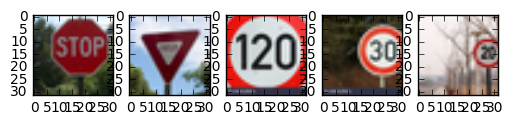

In [25]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from PIL import Image, ImageOps,ImageChops
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

def thumbitandcenter(filename, size):
    image = Image.open(filename)
    image.thumbnail(size, Image.ANTIALIAS)
    new_im = Image.new("RGB", size)   ## luckily, this is already black!
    new_im.paste(image, (int((size[0]-image.size[0])/2),
                      int((size[1]-image.size[1])/2)))
    return new_im

def thumbfit(filename, size):
    image = Image.open(filename)
    return ImageOps.fit(image, size, Image.ANTIALIAS)
    
def predictforsigns(names):
    batch_x = np.zeros(shape=(len(names),32,32,3))
    num = 0
    for name in names:
        thumb = thumbfit(name, (32,32))
        imagearr = np.array(thumb)
        plt.subplot(1,5,num+1)
        plt.imshow(imagearr)
        batch_x[num] = imagearr
        num += 1
    batch_x = preprocessImages(batch_x)
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        pred = predict(batch_x).astype(np.float32)
        #test_accuracy = evaluate(batch_x, y_labels)
        return pred

print(predictforsigns(["stopsign.jpg", "yieldsign.jpg", "speedlimit120.jpg", "speedlimit30.jpg", "speedlimit20.jpg"]))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** See above! Some images seem to be clipped or not occupying enough of the image. Might be problematic?! Also the training and testing data is in pretty low resolution - so for images where the sign occupies too little of the image, we are bound to get issues

In [27]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
#S

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
Seems like 2/5 got classified correctly = 40% accuracy. Abysmal!


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** Seems like our model is quite sure of the stop sign and yield sign (14 and 13) since the probabilites are way higher than the others (0.99 for the stop sign and 1.00 for the yield sign!). For the others, its not SO sure (0.7 for the 120kmph sign and 20kmph). However its about 0.9 sure that the 30kmph sign is a 60kmph sign. Somebody help us :D


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

  0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
100%|██████████| 5/5 [00:00<00:00, 155.48it/s]


TopKV2(values=array([[  9.99983072e-01,   1.48320132e-05,   1.04286948e-06],
       [  1.00000000e+00,   7.80027926e-18,   6.32271373e-19],
       [  7.20390379e-01,   2.55108684e-01,   5.28171379e-03],
       [  9.03512239e-01,   5.05061820e-02,   2.44737305e-02],
       [  7.39602804e-01,   2.60359168e-01,   3.52801471e-05]], dtype=float32), indices=array([[14,  7, 33],
       [13,  1, 32],
       [ 6,  8, 16],
       [ 3,  7, 12],
       [13, 12,  1]], dtype=int32))


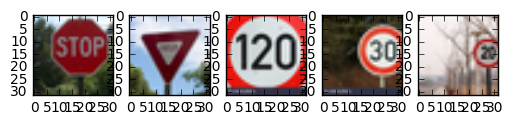

In [16]:
def topkforsigns(names):
    batch_x = np.zeros(shape=(len(names),32,32,3))
    num = 0
    for name in names:
        thumb = thumbfit(name, (32,32))
        imagearr = np.array(thumb)
        plt.subplot(1,5,num+1)
        plt.imshow(imagearr)

        batch_x[num] = imagearr
        num += 1
    
    batch_x = preprocessImages(batch_x)
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        pred = topk(batch_x,3)
        #test_accuracy = evaluate(batch_x, y_labels)
        return pred
    
print(topkforsigns(["stopsign.jpg", "yieldsign.jpg", "speedlimit120.jpg", "speedlimit30.jpg", "speedlimit20.jpg"]))